# Xopt class, TNK test function

This is the class method for running Xopt.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [2]:
# Import the class
from xopt import Xopt

# Notebook printing output
from xopt import output_notebook
output_notebook()


The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null}

algorithm:
  name: cnsga
  options:
    max_generations: 50
    population_size: 128
    show_progress: True
  
simulation: 
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

In [4]:
# Optional: Connect the function directly
#from xopt.evaluators.test_TNK import evaluate_TNK 
#config['simulation']['evaluate'] = evaluate_TNK 

X = Xopt(config)
X

Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.



            Xopt 
________________________________           
Version: 0.4.3+178.g392b747.dirty
Configured: True
Config as YAML:
xopt: {output_path: null}
algorithm:
  name: cnsga
  options: {max_generations: 50, population_size: 128, show_progress: true, population: null,
    seed: null, crossover_probability: 0.9, mutation_probability: 1.0, selection: auto,
    verbose: null}
  function: xopt.cnsga.cnsga
simulation:
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  function: xopt.tests.evaluators.TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

In [5]:
# Note that the repr string contains all of the config information
X.random_evaluate()

{'y1': 0.33301119933977213,
 'y2': 1.6197659590613929,
 'c1': 1.8340115613003478,
 'c2': 1.2817610626186222,
 'some_array': array([1, 2, 3])}

# Run CNSGA

CNSGA is designed to run in parallel with an asynchronous executor as defined in PEP 3148

In [6]:
#import logging, sys
#logging.basicConfig(format='%(message)s', level=logging.INFO, stream=sys.stdout)

In [7]:
# Pick one of these

#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [8]:
# Change max generations
X.algorithm['options']['max_generations'] = 10
X.run(executor=executor)

Starting at time 2021-09-27T21:56:44-07:00

    
    
     ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
    ▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
    ▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
    ▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
    ▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
    ░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
      ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
    ░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
    ░ ░               ░       ░        ░       ░  ░
    ░                                              
    
    
    Continuous Non-dominated Sorting Genetic Algorithm
    Version 0.4.3+178.g392b747.dirty
    
Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
Initializing with a new population, size 128
Maximum generations: 10
____________________________________________________
128 fitness calculations for initial generation
done.
Submitting 

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 0 completed in 0.00208 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 1 completed in 0.00401 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 2 completed in 0.00398 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 3 completed in 0.00372 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 4 completed in 0.00353 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 5 completed in 0.00324 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 6 completed in 0.00314 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 7 completed in 0.00376 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 8 completed in 0.00389 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 9 completed in 0.00314 minutes


In [9]:
# The last population is saved internally:
list(X.results)

['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs']

In [10]:
X.results['outputs'][0:5]

[{'y1': 0.22524245050292685,
  'y2': 0.9343099465903918,
  'c1': 0.0036725523792643933,
  'c2': 0.2641168407129856,
  'some_array': array([1, 2, 3])},
 {'y1': 0.15678213036244615,
  'y2': 0.9946174258530668,
  'c1': 0.0940488785384031,
  'c2': 0.36244490399605495,
  'some_array': array([1, 2, 3])},
 {'y1': 0.9280792161401854,
  'y2': 0.4551060753958438,
  'c1': 0.01539290920388546,
  'c2': 0.18526727975755924,
  'some_array': array([1, 2, 3])},
 {'y1': 0.14470080070519548,
  'y2': 1.011609163256102,
  'c1': 0.10889864036270927,
  'c2': 0.387981456947138,
  'some_array': array([1, 2, 3])},
 {'y1': 0.7878829205341547,
  'y2': 0.7156218522665277,
  'c1': 0.060971545360850046,
  'c2': 0.12936935911012273,
  'some_array': array([1, 2, 3])}]

In [ ]:
# Increase the max_generations, and it will continue where it left off
X.algorithm['options']['max_generations'] = 20
X.run(executor=executor)

Starting at time 2021-09-27T21:56:49-07:00

    
    
     ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
    ▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
    ▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
    ▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
    ▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
    ░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
      ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
    ░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
    ░ ░               ░       ░        ░       ░  ░
    ░                                              
    
    
    Continuous Non-dominated Sorting Genetic Algorithm
    Version 0.4.3+178.g392b747.dirty
    
Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
Loading config from dict.
Initializing with existing population, size 128
Maximum generations: 31
____________________________________________________
128 fitness calculations for initial

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 11 completed in 0.00715 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 12 completed in 0.00577 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 13 completed in 0.00589 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 14 completed in 0.00585 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 15 completed in 0.00608 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 16 completed in 0.00562 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 17 completed in 0.00574 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 18 completed in 0.00613 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 19 completed in 0.00540 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 20 completed in 0.00585 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 21 completed in 0.00584 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 22 completed in 0.00537 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 23 completed in 0.00517 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 24 completed in 0.00490 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 25 completed in 0.00506 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 26 completed in 0.00499 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 27 completed in 0.00504 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 28 completed in 0.00497 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 29 completed in 0.00491 minutes


  0%|          | 0/128 [00:00<?, ?it/s]

Generation 30 completed in 0.00479 minutes


# Run with MPI

In [ ]:
# X.save('test.json')
# !mpirun -n 4 python -m mpi4py.futures -m xopt.mpi.run -vv --logfile xopt.log test.json 

# Plot

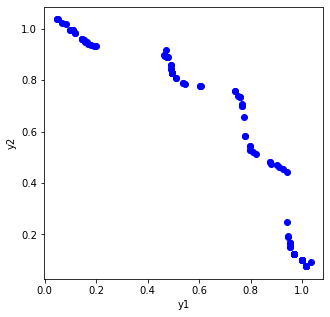

In [ ]:
# Extract objectives from output
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.results['outputs']]
y = [o[key2] for o in X.results['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)